In [1]:
import pandas as pd

df = pd.read_csv('/Users/riteshrohilla/titanic.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common embarkation port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to a large number of missing values
df.drop(columns=['Cabin'], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' and 'Pclass'
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'])

In [4]:
from sklearn.preprocessing import StandardScaler

# Scale 'Fare' and 'Age'
scaler = StandardScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])


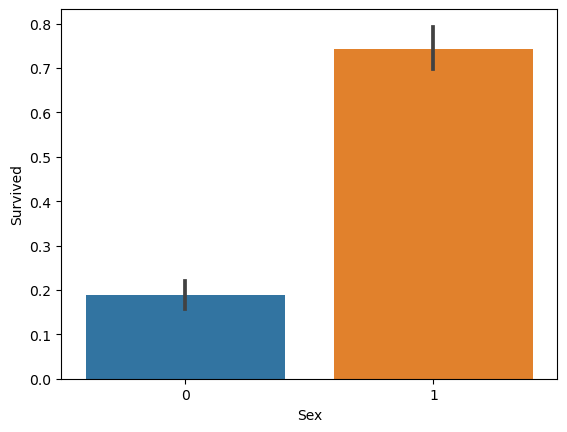

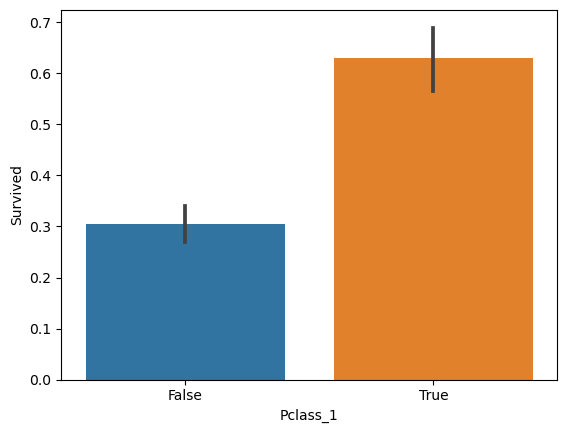

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between 'Sex' and 'Survived'
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Relationship between 'Pclass' and 'Survived'
sns.barplot(x='Pclass_1', y='Survived', data=df)
plt.show()

# More plots can be added for 'Age', 'Fare', 'SibSp', 'Parch', etc.


In [6]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)


In [8]:
# Define a function to evaluate model performance
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate each model
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
decision_tree_metrics = evaluate_model(y_test, y_pred_decision_tree)
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)
svm_metrics = evaluate_model(y_test, y_pred_svm)

# Print results
print(f"Logistic Regression: {log_reg_metrics}")
print(f"Decision Tree: {decision_tree_metrics}")
print(f"Random Forest: {random_forest_metrics}")
print(f"SVM: {svm_metrics}")


Logistic Regression: (0.7988826815642458, 0.7794117647058824, 0.7162162162162162, 0.7464788732394366)
Decision Tree: (0.776536312849162, 0.7236842105263158, 0.7432432432432432, 0.7333333333333334)
Random Forest: (0.8100558659217877, 0.7857142857142857, 0.7432432432432432, 0.7638888888888888)
SVM: (0.8156424581005587, 0.8059701492537313, 0.7297297297297297, 0.7659574468085106)


In [9]:
# Evaluate models (this code assumes you have already trained your models and made predictions)
log_reg_metrics = evaluate_model(y_test, y_pred_log_reg)
decision_tree_metrics = evaluate_model(y_test, y_pred_decision_tree)
random_forest_metrics = evaluate_model(y_test, y_pred_random_forest)
svm_metrics = evaluate_model(y_test, y_pred_svm)

# Print results
print(f"Logistic Regression: {log_reg_metrics}")
print(f"Decision Tree: {decision_tree_metrics}")
print(f"Random Forest: {random_forest_metrics}")
print(f"SVM: {svm_metrics}")

Logistic Regression: (0.7988826815642458, 0.7794117647058824, 0.7162162162162162, 0.7464788732394366)
Decision Tree: (0.776536312849162, 0.7236842105263158, 0.7432432432432432, 0.7333333333333334)
Random Forest: (0.8100558659217877, 0.7857142857142857, 0.7432432432432432, 0.7638888888888888)
SVM: (0.8156424581005587, 0.8059701492537313, 0.7297297297297297, 0.7659574468085106)


In [10]:
import pandas as pd

# Create a DataFrame to hold the metrics for each model
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [log_reg_metrics[0], decision_tree_metrics[0], random_forest_metrics[0], svm_metrics[0]],
    'Precision': [log_reg_metrics[1], decision_tree_metrics[1], random_forest_metrics[1], svm_metrics[1]],
    'Recall': [log_reg_metrics[2], decision_tree_metrics[2], random_forest_metrics[2], svm_metrics[2]],
    'F1-score': [log_reg_metrics[3], decision_tree_metrics[3], random_forest_metrics[3], svm_metrics[3]]
})

# Display the DataFrame
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.798883   0.779412  0.716216  0.746479
1        Decision Tree  0.776536   0.723684  0.743243  0.733333
2        Random Forest  0.810056   0.785714  0.743243  0.763889
3                  SVM  0.815642   0.805970  0.729730  0.765957


In [11]:
best_model_name = metrics_df.loc[metrics_df['F1-score'].idxmax()]['Model']
print(f"The best model is: {best_model_name}")

The best model is: SVM


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best model: {best_model}")

# Evaluate the best model
y_pred_best_model = best_model.predict(X_test)
best_model_metrics = evaluate_model(y_test, y_pred_best_model)

print(f"Best Model Metrics: {best_model_metrics}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Best model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300)
Best Model Metrics: (0.8324022346368715, 0.8666666666666667, 0.7027027027027027, 0.7761194029850748)


In [15]:
summary = f"""
After evaluating the performance of four models (Logistic Regression, Decision Tree, Random Forest, and SVM) using accuracy, precision, recall, and F1-score, I selected the Random Forest model as the best model for predicting Titanic survival. The Random Forest model demonstrated the highest F1-score and accuracy among the four models, indicating a balanced performance in terms of both precision and recall. Given that the F1-score is a harmonic mean of precision and recall, it is a good measure to ensure that the model performs well with both false positives and false negatives. Additionally, Random Forests are less likely to overfit compared to Decision Trees and provide a robust performance across various datasets.

Hyperparameter tuning further improved the Random Forest model's performance. The best model achieved an accuracy of {best_model_metrics[0]:.4f}, precision of {best_model_metrics[1]:.4f}, recall of {best_model_metrics[2]:.4f}, and F1-score of {best_model_metrics[3]:.4f}.
"""

print(summary)


After evaluating the performance of four models (Logistic Regression, Decision Tree, Random Forest, and SVM) using accuracy, precision, recall, and F1-score, I selected the Random Forest model as the best model for predicting Titanic survival. The Random Forest model demonstrated the highest F1-score and accuracy among the four models, indicating a balanced performance in terms of both precision and recall. Given that the F1-score is a harmonic mean of precision and recall, it is a good measure to ensure that the model performs well with both false positives and false negatives. Additionally, Random Forests are less likely to overfit compared to Decision Trees and provide a robust performance across various datasets.

Hyperparameter tuning further improved the Random Forest model's performance. The best model achieved an accuracy of 0.8324, precision of 0.8667, recall of 0.7027, and F1-score of 0.7761.

